In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('..')

In [7]:
import torch

In [46]:
def filter_and_plot(filterlist, to_plot, dir='./outputs', aggregate=False, plotall=False, **kwargs):
    """
    Filters from files in a directory, and plots their results in a single plot
    """
    dicts = []
    filenames = []
    for file in os.listdir(dir):
        if all(word in file for word in filterlist):
            d = torch.load(os.path.join('./outputs', file))
            dicts.append(d)
            filenames.append(file)
    values = [d[to_plot] for d in dicts]
    
    plt.figure()
    if aggregate:
        values_np = np.asarray(values)
        avgs = values_np.mean(axis=0)
        stds = values_np.std(axis=0)
        x = [i for i in range(len(avgs))]
        plt.figure()
        plt.plot(x, avgs, 'k', label='average')
        plt.fill_between(x, avgs-stds, avgs+stds,
            alpha=0.2, facecolor='#089FFF',
            linewidth=4, antialiased=True)
    
    if plotall:
        for series, filename in zip(values, filenames):
            plt.plot(series, label=filename)

    if to_plot == 'val_accs':
        plt.ylim(0.5, 1)
        plt.ylabel('Classification Accuracy')
        plt.xlabel('Epochs')
    elif to_plot == 'train_losses':
        plt.ylabel('Train Loss')
        plt.xlabel('Train Steps')

    for key, val in kwargs.items():
        if key == 'title':
            plt.title(val)

    plt.legend(bbox_to_anchor=[1, 0.5], loc='center left')
    plt.show()



# "_".join([f'{args.alg}', f'{args.backbone}', f'{args.optim}', f'augment={args.augmentation}', f'epochs={args.epochs}', f'bs={args.bs}', f'lr={args.lr}', f'wd={args.wd}'])

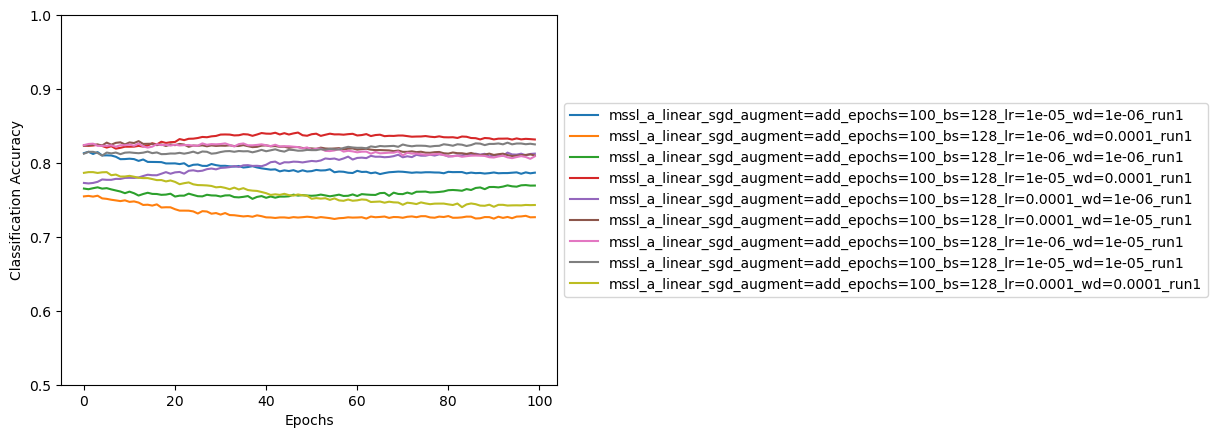

In [10]:
mssl_sgd_list = ['mssl_a', 'linear', 'sgd']
filter_and_plot(mssl_sgd_list, to_plot='val_accs')

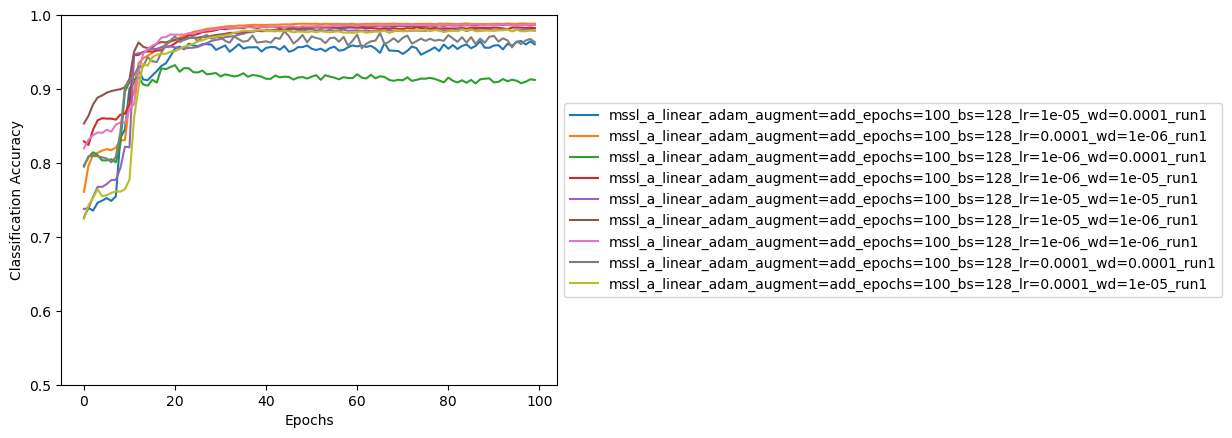

In [17]:
mssl_adam_list = ['mssl_a', 'linear', 'adam']
filter_and_plot(mssl_adam_list, to_plot='val_accs')

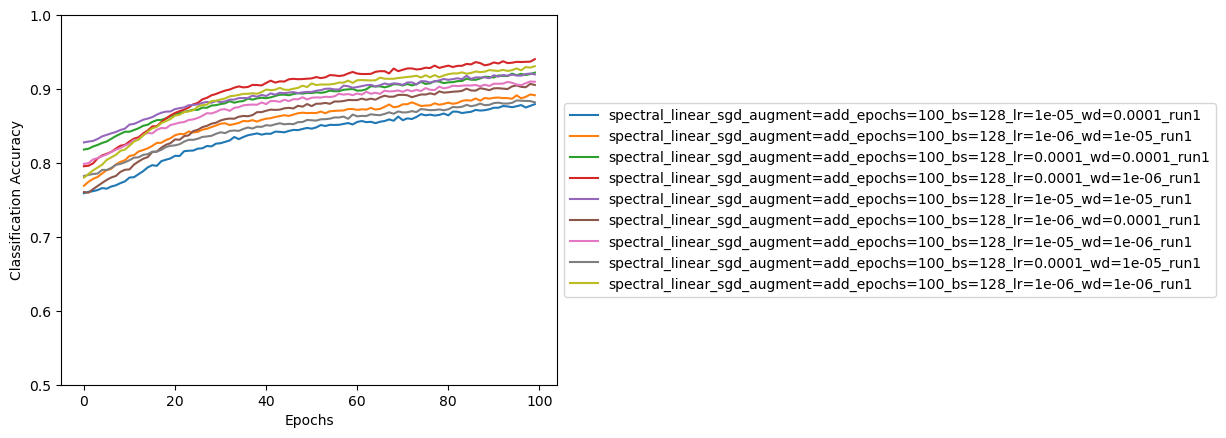

In [14]:
scl_sgd_list = ['spectral', 'linear', 'sgd']
filter_and_plot(scl_sgd_list, to_plot='val_accs')

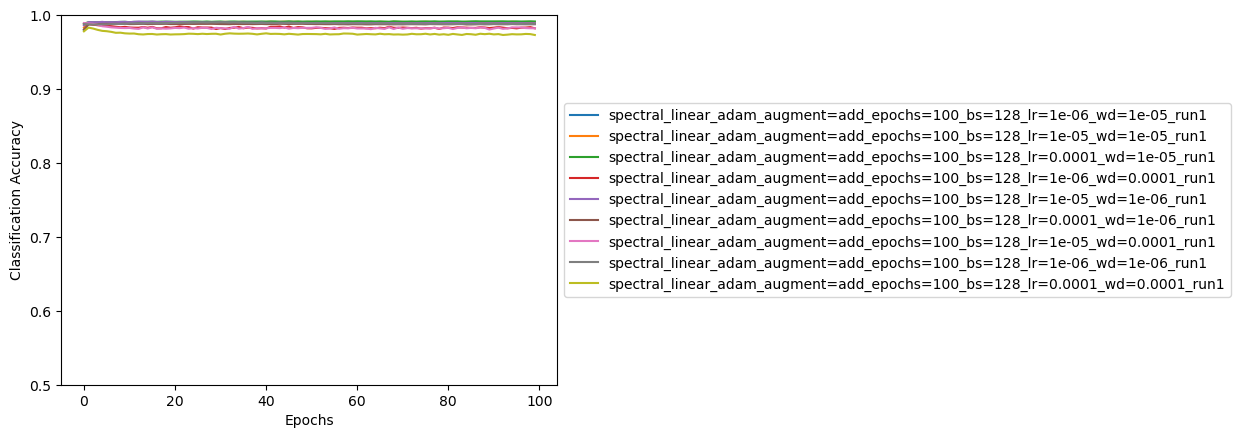

In [21]:
scl_adam_list = ['spectral', 'linear', 'adam']
filter_and_plot(scl_adam_list, to_plot='val_accs')

In [ ]:
def plot_results(start_idx, end_idx, to_plot, prefix, title, plot_all=False):
    dicts = []
    for i in range(start_idx, end_idx+1):
        dictionary = torch.load(f'./outputs/{prefix}_run{i}')
        dicts.append(dictionary)

    if to_plot == 'val':
        values = [dictionary['val_accs'] for dictionary in dicts]
    elif to_plot == 'train':
        values = [dictionary['train_losses'] for dictionary in dicts]

    values_np = np.asarray(values)
    avgs = values_np.mean(axis=0)
    stds = values_np.std(axis=0)

    x = [i for i in range(len(avgs))]
    plt.figure()
    plt.plot(x, avgs, 'k')
    plt.fill_between(x, avgs-stds, avgs+stds,
        alpha=0.2, facecolor='#089FFF',
        linewidth=4, antialiased=True)
    if to_plot == 'val':
        plt.ylim(0.5, 1)
        plt.ylabel('Classification Accuracy')
        plt.xlabel('Epochs')
    elif to_plot == 'train':
        plt.ylabel('Train Loss')
        plt.xlabel('Train Steps')
    
    plt.title(title)
    
    if plot_all:
        plt.plot(values_np.T)
    plt.show()


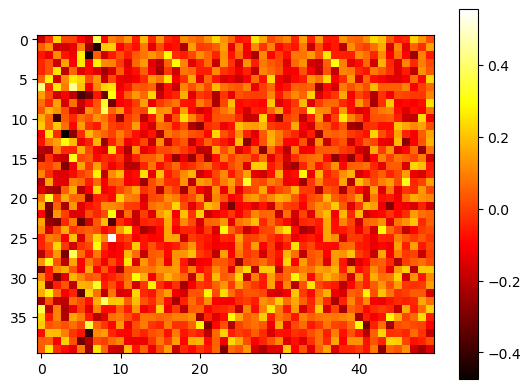

In [39]:
mssl_filename = 'mssl_a_linear_adam_augment=add_epochs=100_bs=128_lr=0.0001_wd=1e-06_run1'
mssl_dict = torch.load(os.path.join('./outputs', mssl_filename))
mssl_weights = mssl_dict['model_weights']

plt.imshow(mssl_weights['weight'], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


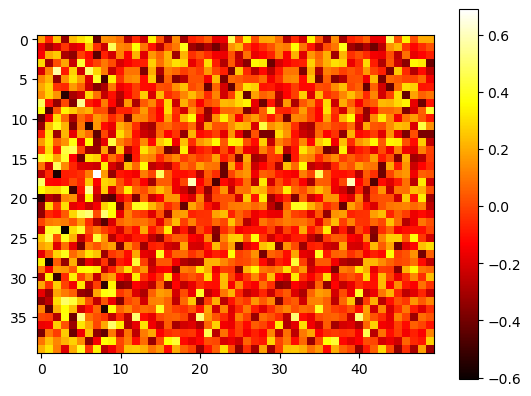

In [38]:
scl_filename = 'spectral_linear_adam_augment=add_epochs=100_bs=128_lr=0.0001_wd=1e-06_run1'
scl_dict = torch.load(os.path.join('./outputs', scl_filename))
scl_weights = scl_dict['model_weights']
plt.imshow(scl_weights['weight'], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


<Figure size 640x480 with 0 Axes>

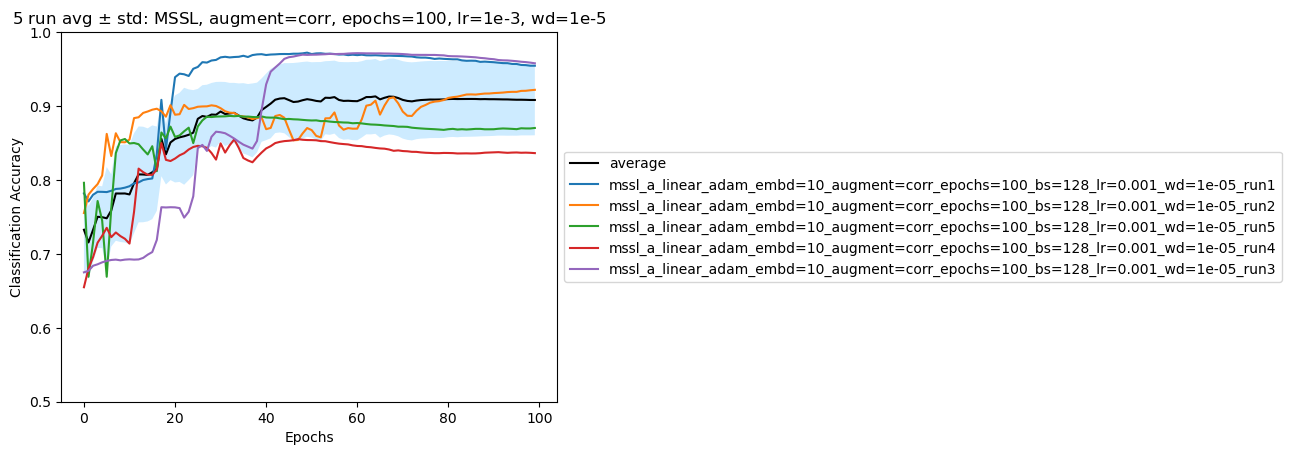

<Figure size 640x480 with 0 Axes>

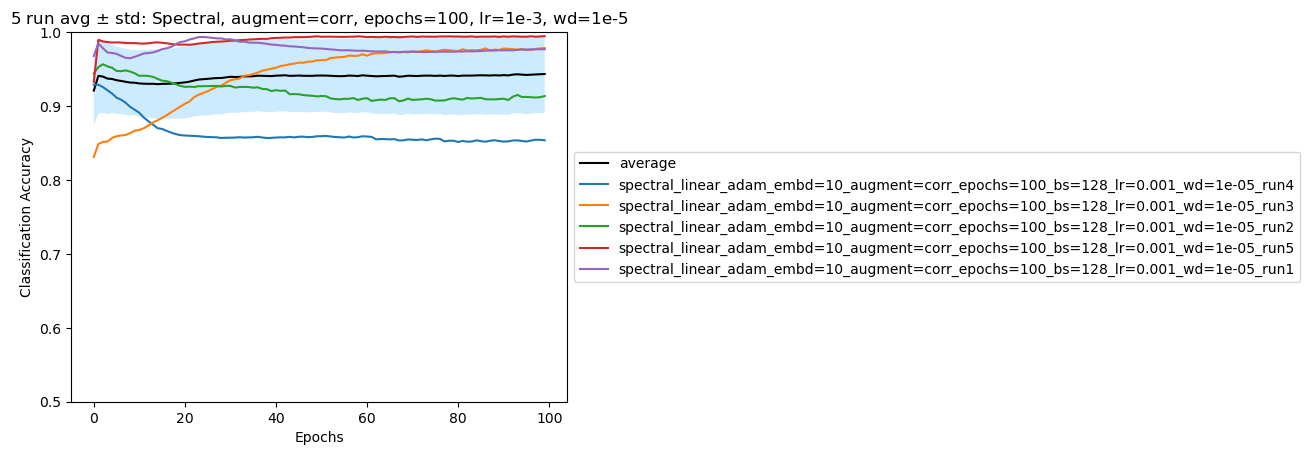

In [51]:
filter_and_plot(['mssl_a', 'linear', 'adam'], to_plot='val_accs', aggregate=True, plotall=True, title='5 run avg $\pm$ std: MSSL, augment=corr, epochs=100, lr=1e-3, wd=1e-5')
filter_and_plot(['spectral', 'linear', 'adam'], to_plot='val_accs', aggregate=True, plotall=True, title='5 run avg $\pm$ std: Spectral, augment=corr, epochs=100, lr=1e-3, wd=1e-5')

In [ ]:
path = './outputs/old/corr_runs'

In [66]:
d_dict = torch.load(os.path.join(path, 'spectral_linear_adam_embd=10_augment=corr_epochs=100_bs=128_lr=0.001_wd=1e-05_run2'))
scl_weights = d_dict['model_weights']
scl_weights.keys()

odict_keys(['weight', 'bias'])

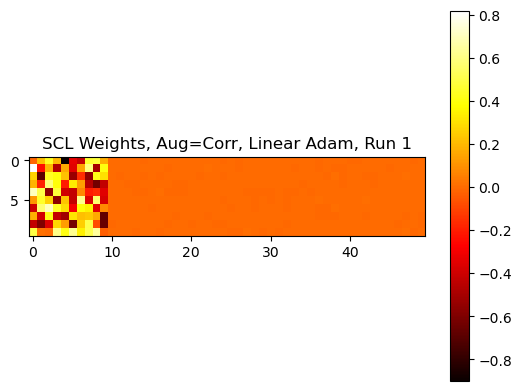

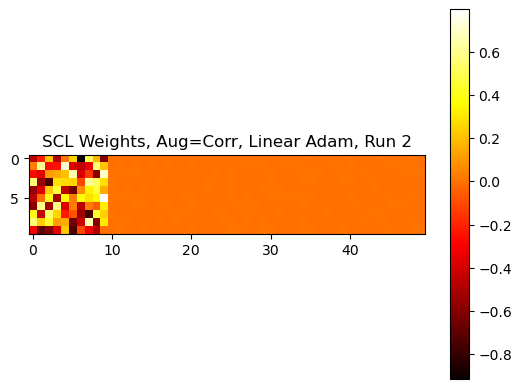

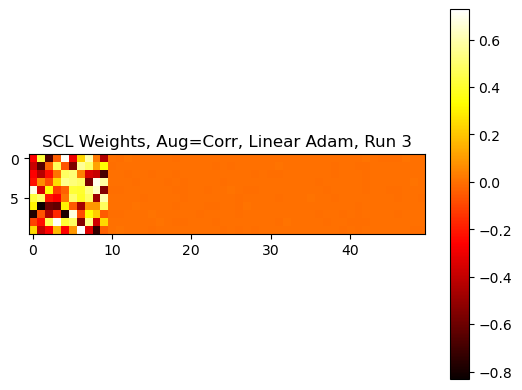

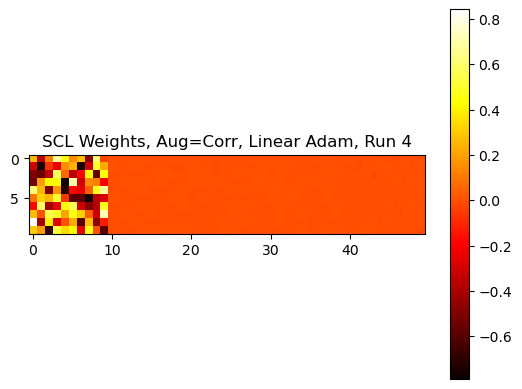

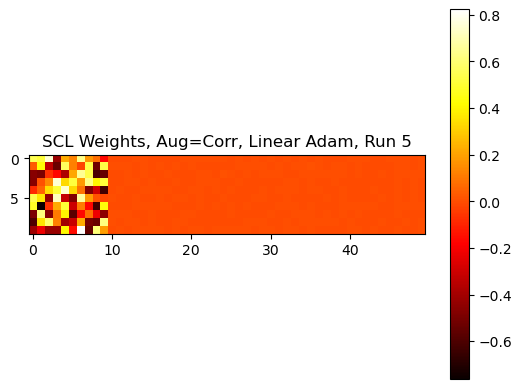

In [62]:
# examine weights learnt from spectral
# d = 50, k = 10
num_runs = 5
for i in range(1, num_runs+1):
    d_dict = torch.load(os.path.join(path, f'spectral_linear_adam_embd=10_augment=corr_epochs=100_bs=128_lr=0.001_wd=1e-05_run{i}'))
    scl_weights = d_dict['model_weights']
    plt.figure()
    plt.imshow(scl_weights['weight'], cmap='hot', interpolation='nearest')
    plt.title(f'SCL Weights, Aug=Corr, Linear Adam, Run {i}')
    plt.colorbar()
plt.show()

In [64]:
num_runs = 5
k = 10
for i in range(1, num_runs+1):
    d_dict = torch.load(os.path.join(path, f'spectral_linear_adam_embd=10_augment=corr_epochs=100_bs=128_lr=0.001_wd=1e-05_run{i}'))
    scl_weights = d_dict['model_weights']
    augmented_dim_weights = scl_weights['weight'][:, k:]
    print(f'Run {i}: Avg={torch.mean(augmented_dim_weights)}, Max={torch.max(augmented_dim_weights)}, Min={torch.min(augmented_dim_weights)}')

Run 1: Avg=4.7510260628769174e-05, Max=0.005695418454706669, Min=-0.00760711170732975
Run 2: Avg=-0.00013900361955165863, Max=0.005620860029011965, Min=-0.0065686628222465515
Run 3: Avg=-6.350127659970894e-05, Max=0.005695160012692213, Min=-0.007590607739984989
Run 4: Avg=0.00014092009223531932, Max=0.006490540225058794, Min=-0.007285724394023418
Run 5: Avg=-0.0002264813956571743, Max=0.007033155299723148, Min=-0.005933403968811035


In [71]:
num_runs = 5
for i in range(1, num_runs+1):
    d_dict = torch.load(os.path.join(path, f'spectral_linear_adam_embd=10_augment=corr_epochs=100_bs=128_lr=0.001_wd=1e-05_run{i}'))
    scl_weights = d_dict['model_weights']
    print(scl_weights['bias'])
    # plt.figure()
    # plt.imshow(scl_weights['bias'].unsqueeze(dim=0), cmap='hot', interpolation='nearest', vmin=-0.8, vmax=0.8)
    # plt.title(f'SCL Biases, Aug=Corr, Linear Adam, Run {i}')
    # plt.colorbar()
# plt.show()

tensor([-0.2291, -0.1018,  0.1717, -0.3683,  0.2009, -0.2311,  0.2786,  0.3969,
        -0.1621, -0.0981])
tensor([-0.0563,  0.2998,  0.3478, -0.0581,  0.3559, -0.2985, -0.3334, -0.2408,
        -0.0558, -0.1340])
tensor([-0.2448,  0.2858,  0.3975, -0.1023, -0.0575,  0.2887, -0.0679, -0.0998,
        -0.2141, -0.4029])
tensor([ 0.3662, -0.2981,  0.1874,  0.1474,  0.0289, -0.1378,  0.2409, -0.3790,
         0.2456, -0.2151])
tensor([ 0.2820, -0.3318,  0.0044,  0.1810, -0.3042, -0.2137,  0.2911,  0.3933,
        -0.0308, -0.0498])


In [81]:
# look at run 5
d_dict = torch.load(os.path.join(path, 'spectral_linear_adam_embd=10_augment=corr_epochs=100_bs=128_lr=0.001_wd=1e-05_run5'))
scl_weights, scl_bias = d_dict['model_weights']['weight'], d_dict['model_weights']['bias']
data = d_dict['data'] # 0,1,2 are x1, x2, y
train_x1, train_x2, y = data['train'][0], data['train'][1], data['train'][2]

In [82]:
y[:8]

tensor([0., 0., 1., 0., 0., 1., 1., 0.])

In [87]:
y1 = train_x1[:8, :k].sum(dim=1)
y1

tensor([-2.7542, -1.1289,  1.3177, -0.7552, -1.3870,  2.6630,  0.4904, -0.2509])

In [88]:
y2 = train_x2[:8, :k].sum(dim=1)
y2

tensor([-2.7542, -1.1289,  1.3177, -0.7552, -1.3870,  2.6630,  0.4904, -0.2509])